In [1]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


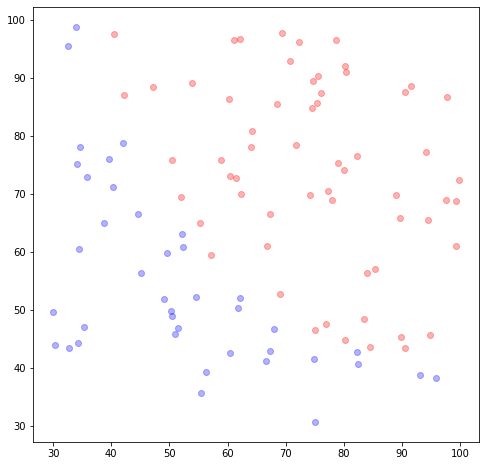

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

with open('drive/My Drive/machine_learning_data/assignment05/data.txt', newline='') as file:
  data= np.genfromtxt(file, delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]

x_label0 = x[label == 0]
x_label1 = x[label == 1]

y_label0 = y[label == 0]
y_label1 = y[label == 1]

m = len(x)

# Visualization
# 1. Plot the training data
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [0]:
#initialize Train Parameter
theta0 = 1
theta1 = 1
theta2 = -3

In [0]:
#Define linear function & cost function & derivative function of cost function
def zFunc(x, y):
  return theta0 + theta1*x + theta2*y

def sigmaFunc(x, y):
  return 1/(1+np.exp(-1 * zFunc(x, y)))

def j(x, y, label):
  return 1/m * np.sum(((-1 * label) * np.log(sigmaFunc(x, y))) - ((1-label) * np.log(1-sigmaFunc(x, y))))

def jPrimeTheta0(x, y, label):
  return 1/m * np.sum(sigmaFunc(x, y) - label)

def jPrimeTheta1(x, y, label):
  return 1/m * np.sum((sigmaFunc(x, y) - label) * x)

def jPrimeTheta2(x, y, label):
  return 1/m * np.sum((sigmaFunc(x, y) - label) * y)

In [0]:
# Define update Function

learningRate = 0.0025

def updateTheta(x, y, label):
  updateTheta0 = theta0 - (learningRate * jPrimeTheta0(x, y, label))
  updateTheta1 = theta1 - (learningRate * jPrimeTheta1(x, y, label))
  updateTheta2 = theta2 - (learningRate * jPrimeTheta2(x, y, label))

  return updateTheta0, updateTheta1, updateTheta2

In [0]:
#Learning
theta0Value = []
theta1Value = []
theta2Value = []
trainingError = []
counter = 0

while(1):
  counter = counter+1
  theta0Value.append(theta0)
  theta1Value.append(theta1)
  theta2Value.append(theta2)
  trainingError.append(j(x, y, label))

  tempTheta0 = theta0
  tempTheta1 = theta1
  tempTheta2 = theta2

  theta0, theta1, theta2 = updateTheta(x, y, label)
  if (counter%1000) == 0:
    print("Theta0 : "+str(theta0)+" Theta1 : "+str(theta1)+" Theta2 : "+str(theta2))

  if (round(tempTheta0, 8) == round(theta0, 8)) and (round(tempTheta1, 8) == round(theta1, 8)) and (round(tempTheta2, 8) == round(theta2, 8)):
    break

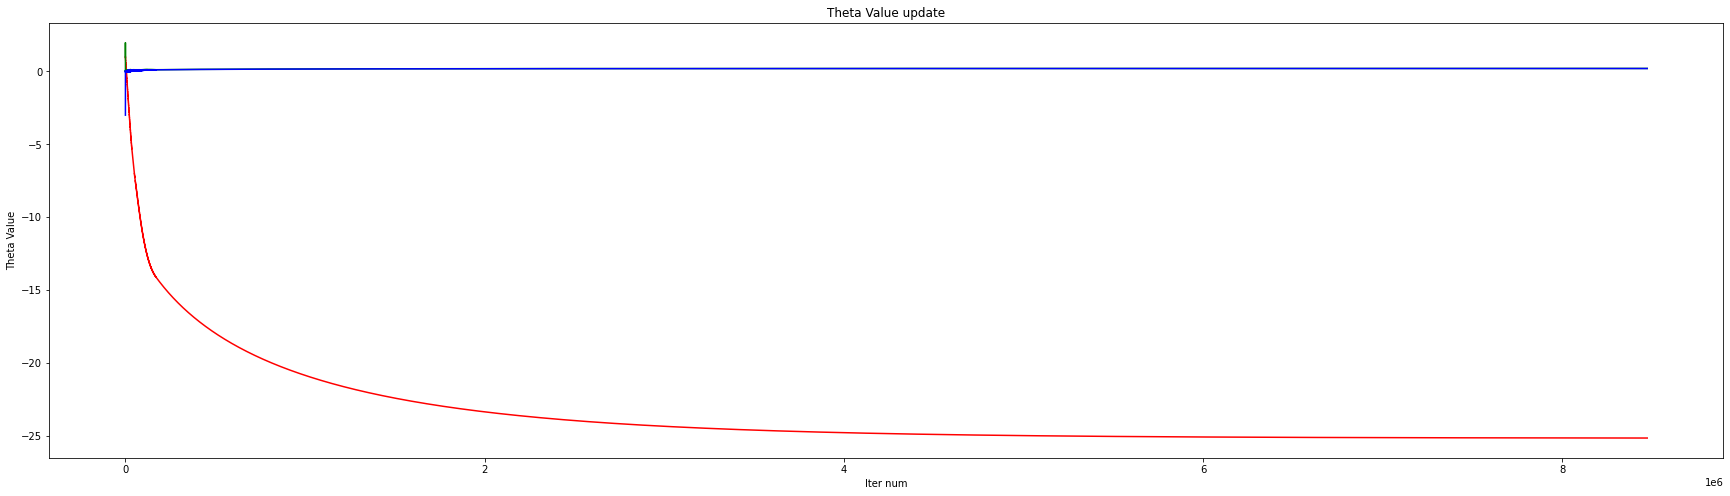

In [7]:
#Visualize of Estimated Parameters
plt.figure(figsize=(30, 8))
plt.plot(range(len(theta0Value)), theta0Value, c='r')
plt.plot(range(len(theta1Value)), theta1Value, c='g')
plt.plot(range(len(theta2Value)), theta2Value, c='b')
plt.title('Theta Value update')
plt.xlabel('Iter num')
plt.ylabel('Theta Value')
plt.show()

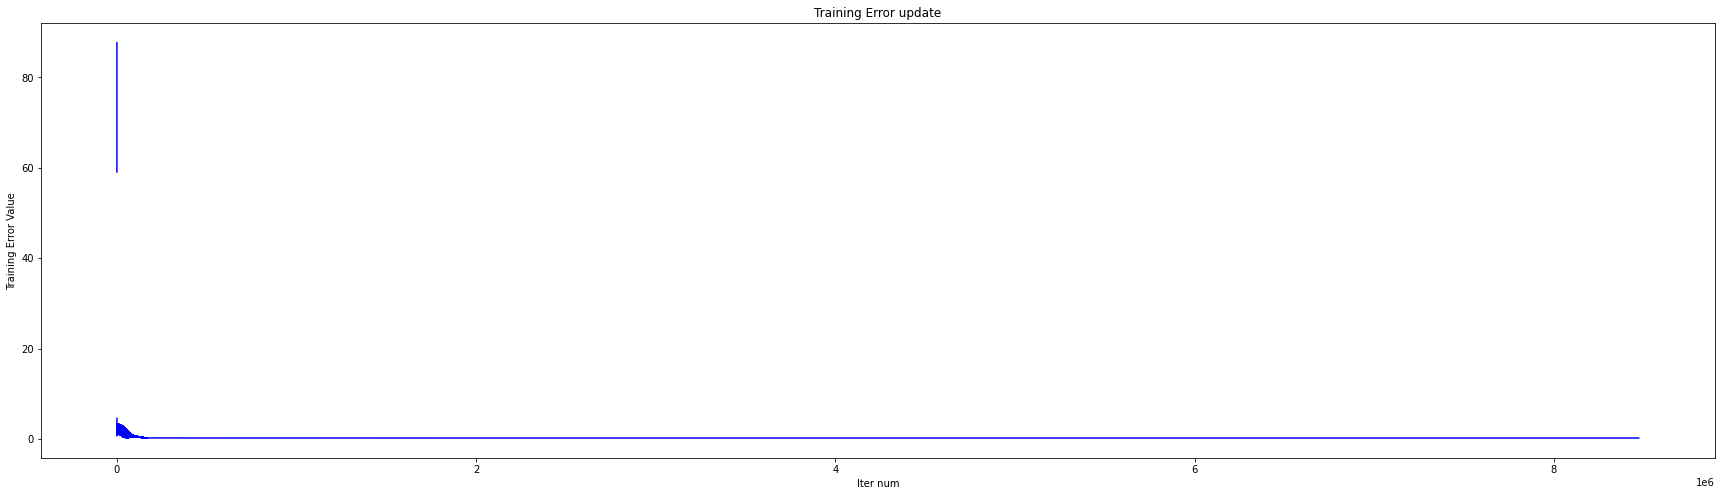

In [8]:
#Visualize of Estimated Parameters
plt.figure(figsize=(30, 8))
plt.plot(range(len(trainingError)), trainingError, c='b')
plt.title('Training Error update')
plt.xlabel('Iter num')
plt.ylabel('Training Error Value')
plt.show()

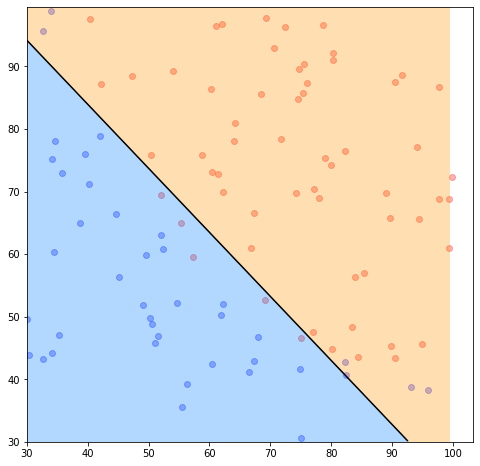

In [20]:
#Visualize of obtained Classifier
deleteIndex = []
plotX = np.arange(30, 100, 0.5)
plotClassifier = -1 * (((theta1*plotX) + theta0) / theta2 )

for i in range(len(rangeX)):
  if plotClassifier[i] > 100 or plotClassifier[i] < 30:
    deleteIndex.append(i)
plotX = np.delete(plotX, deleteIndex)
plotClassifier = np.delete(plotClassifier, deleteIndex)

rangeX = np.arange(30, 100, 0.5)
rangeY = np.arange(30, 100, 0.5)
rangeX, rangeY = np.meshgrid(rangeX, rangeY)
rangeClassifier = sigmaFunc(rangeX, rangeY)

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.contourf(rangeX, rangeY, rangeClassifier, levels = 1, alpha=0.3, cmap='jet')
plt.plot(plotX, plotClassifier, c='black')
plt.plot()
plt.show()